# Unit 6 - Pythonic Monopoly

### Importing library files

In [6]:
import os
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from pathlib import Path
from panel.interact import interact
from dotenv import load_dotenv
import pylab

%matplotlib inline

## San Francisco Housing Rental Analysis

#### Calling Map API

In [ ]:
load_dotenv()
mapbox_token=os.getenv("MAP_BOX")

#### Loading CSV files for the data analysis

In [9]:
file_path_1=Path("C:\\Users\\vinot\\Fintech\\Udemy\\work_book\\neighborhoods_coordinates.csv")
location_data = pd.read_csv(file_path_1)
file_path_2=Path("C:\\Users\\vinot\\Fintech\\Udemy\\work_book\\sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path_2,index_col="year")

In [10]:
location_data.head()

Neighborhood        Lat         Lon
0     Alamo Square  37.791012 -122.402100
1       Anza Vista  37.779598 -122.443451
2          Bayview  37.734670 -122.401060
3  Bayview Heights  37.728740 -122.410980
4   Bernal Heights  37.728630 -122.443050

In [11]:
sfo_data.head()

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                  
2010      Alamo Square           291.182945         372560        1239
2010        Anza Vista           267.932583         372560        1239
2010           Bayview           170.098665         372560        1239
2010  Buena Vista Park           347.394919         372560        1239
2010  Central Richmond           319.027623         372560        1239

## Housing Units Per Year

##### Using group by function, number of housing units per year is calculated

In [13]:
housing_units_per_year = sfo_data.groupby(['year']).mean()['housing_units']
housing_units_per_year

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

#### Plot the average housing units per year

**Optional challenge**: Use the **min, max, and std** to scale the y limits of the chart

In [16]:
min_value = housing_units_per_year.min()
min_value

372560

In [18]:
max_value=housing_units_per_year.max()
max_value

384242

In [19]:
std_value=housing_units_per_year.std()
std_value

4206.0007132667015

#### Plotting bar graph before applying limts in the y axis

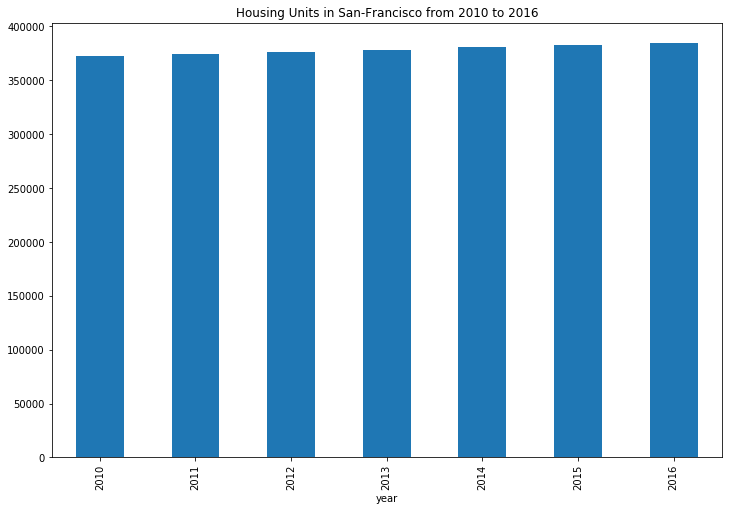

In [21]:
housing_units_per_year.plot.bar(figsize=(12,8), x='Year', y='Housing Units',title='Housing Units in San-Francisco from 2010 to 2016')

#### Plotting bar graph after applying limts in the y axis

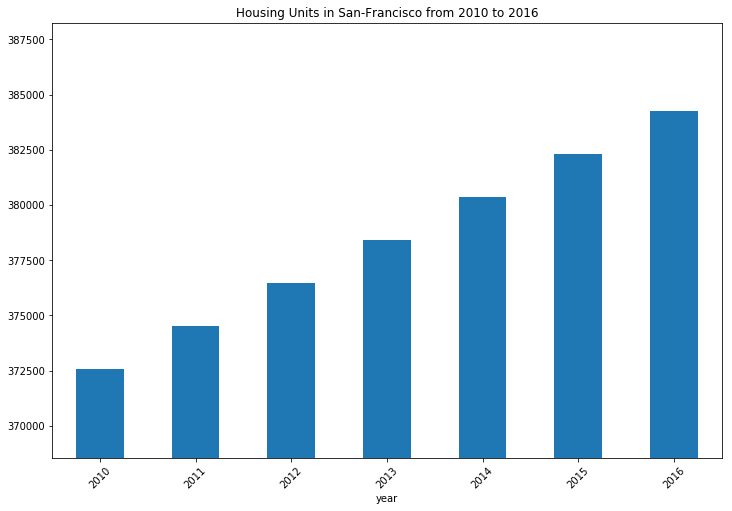

In [29]:
housing_units_per_year.plot.bar(ylim=(min_value-4000,max_value+4000),title='Housing Units in San-Francisco from 2010 to 2016',x ="Year",y="Housing Units",figsize=(12,8),rot=45);

###  Average Prices per Square Foot

#### Average Gross Rent in San Francisco Per Year

In [38]:
avg_gross_rent = sfo_data["gross_rent"].groupby(["year"]).mean()
avg_gross_rent

year
2010    1239
2011    1530
2012    2324
2013    2971
2014    3528
2015    3739
2016    4390
Name: gross_rent, dtype: int64

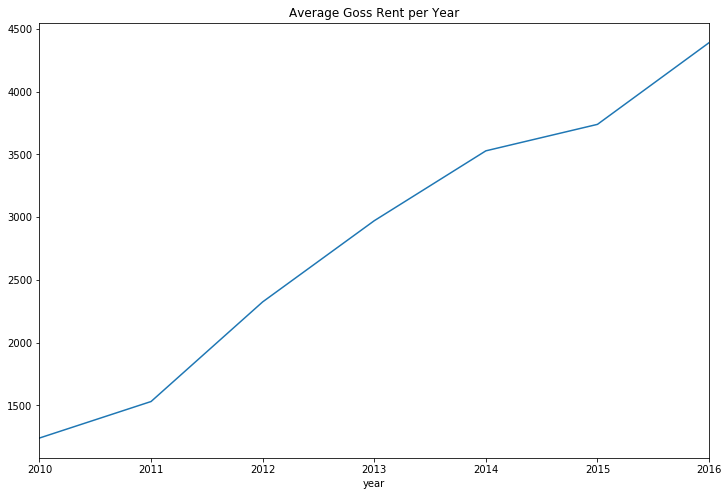

In [39]:
avg_gross_rent.plot.line(title="Average Goss Rent per Year",figsize=(12,8))

#### Average Sales Price in San Francisco

In [40]:
avg_sales_price = sfo_data["sale_price_sqr_foot"].groupby(["year"]).mean()
avg_sales_price

year
2010    369.344353
2011    341.903429
2012    399.389968
2013    483.600304
2014    556.277273
2015    632.540352
2016    697.643709
Name: sale_price_sqr_foot, dtype: float64

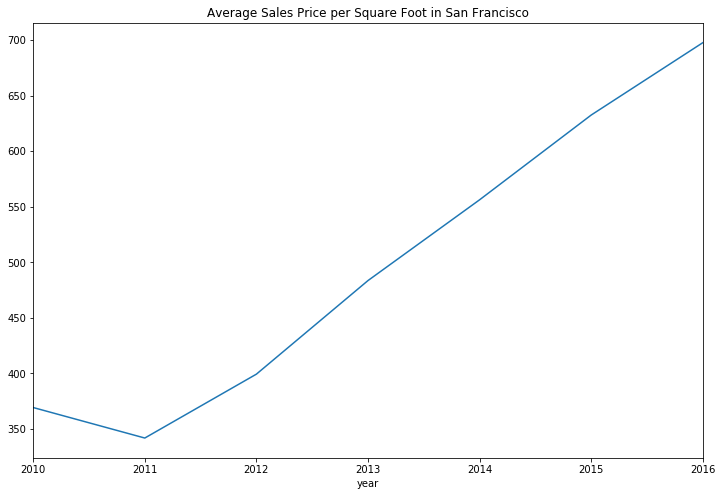

In [41]:
avg_sales_price.plot.line(title="Average Sales Price per Square Foot in San Francisco",figsize=(12,8))

###  Average Prices per Square Foot

##### Creating a New Dataframe sfo_data_01

Grouping by **Year** and **Neighborhood**

In [51]:
sfo_data_01 = sfo_data.groupby([sfo_data.index, "neighborhood"]).mean()
sfo_data_01.reset_index(inplace=True)
sfo_data_01.head(10)

year      neighborhood  sale_price_sqr_foot  housing_units  gross_rent
0  2010      Alamo Square           291.182945         372560        1239
1  2010        Anza Vista           267.932583         372560        1239
2  2010           Bayview           170.098665         372560        1239
3  2010  Buena Vista Park           347.394919         372560        1239
4  2010  Central Richmond           319.027623         372560        1239
5  2010    Central Sunset           418.172493         372560        1239
6  2010    Corona Heights           369.359338         372560        1239
7  2010        Cow Hollow           569.379968         372560        1239
8  2010     Croker Amazon           165.645730         372560        1239
9  2010   Diamond Heights           456.930822         372560        1239

#### Plotting line graph- Grouping the data by Neighborhood to have a dropdown values

In [52]:
sfo_data_01.hvplot.line(
    "year",
    "sale_price_sqr_foot",
    xlabel= "Year",
    ylabel="Avg. Sale Price per Square Foot",
    groupby="neighborhood",
)

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

## The Top 10 Most Expensive Neighborhoods

In [59]:
sfo_exp_places = sfo_data.groupby("neighborhood").mean()
sfo_exp_places = sfo_exp_places.sort_values("sale_price_sqr_foot",ascending=False).head(10)
sfo_exp_places = sfo_exp_places.reset_index()
sfo_exp_places

neighborhood  sale_price_sqr_foot  housing_units   gross_rent
0  Union Square District           903.993258      377427.50  2555.166667
1         Merced Heights           788.844818      380348.00  3414.000000
2          Miraloma Park           779.810842      375967.25  2155.250000
3        Pacific Heights           689.555817      378401.00  2817.285714
4          Westwood Park           687.087575      382295.00  3959.000000
5         Telegraph Hill           676.506578      378401.00  2817.285714
6       Presidio Heights           675.350212      378401.00  2817.285714
7             Cow Hollow           665.964042      378401.00  2817.285714
8           Potrero Hill           662.013613      378401.00  2817.285714
9            South Beach           650.124479      375805.00  2099.000000

#### Plotting the graph for Top 10 Expensive places in SFO

In [65]:
sfo_exp_places.hvplot.bar(
    "neighborhood",
    "sale_price_sqr_foot",
    title="Top 10 Expensive Neighborhoods in SFO",
    xlabel="Neighborhood",
    ylabel="Avg. Sale Price per Square Foot",
    height=500,
    rot=45
)

:Bars   [neighborhood]   (sale_price_sqr_foot)

## Parallel Coordinates and Parallel Categories Analysis

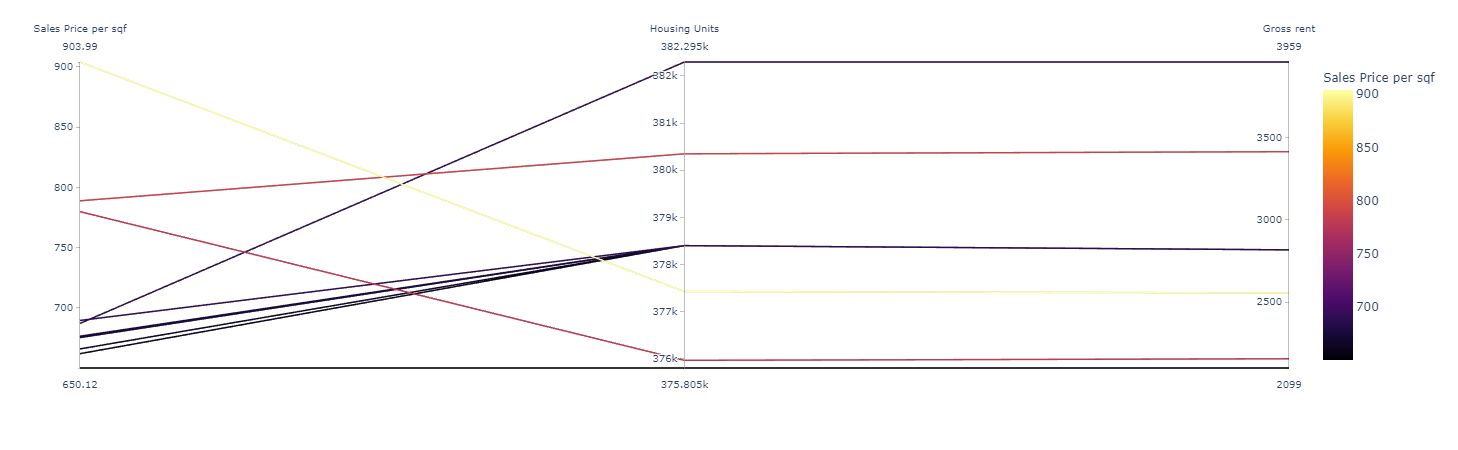

In [67]:
px.parallel_coordinates(
    sfo_exp_places,
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={'neighborhood': "Neighborhood", 
            'sale_price_sqr_foot':'Sales Price per sqf',
           'housing_units':'Housing Units',
           'gross_rent':'Gross rent'},
)

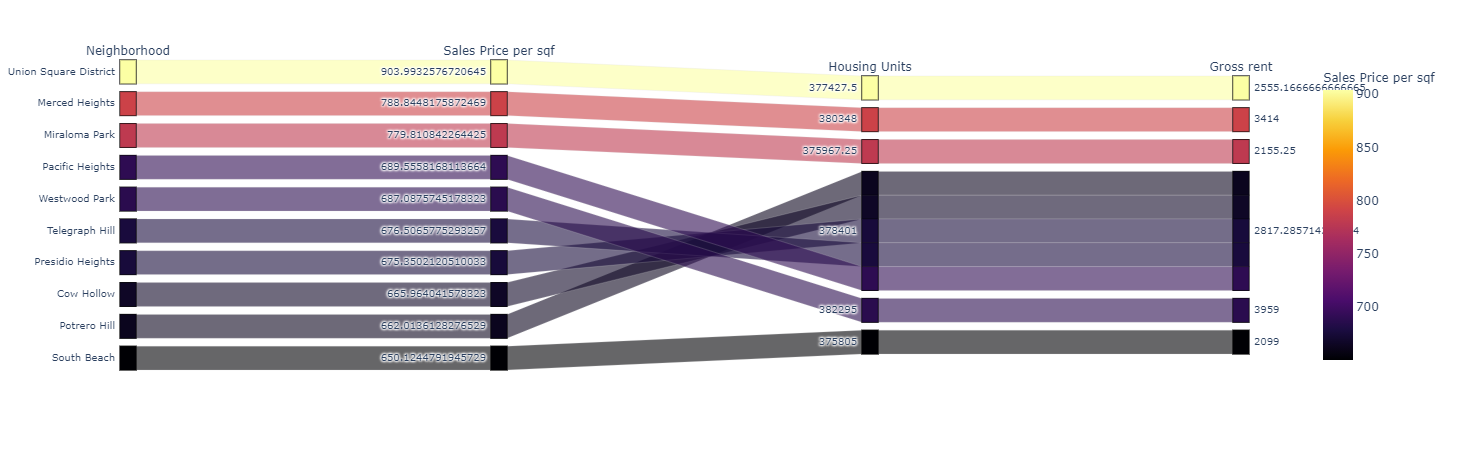

In [68]:
px.parallel_categories(
    sfo_exp_places,
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={'neighborhood': "Neighborhood", 
            'sale_price_sqr_foot':'Sales Price per sqf',
           'housing_units':'Housing Units',
           'gross_rent':'Gross rent'},
)

##  Neighborhood Map

In [70]:
sfo_location_data = sfo_data.groupby("neighborhood").mean()
sfo_location_data = sfo_location_data.sort_values("sale_price_sqr_foot",ascending=False)
sfo_location_data = sfo_location_data.reset_index()
sfo_location_data

neighborhood  sale_price_sqr_foot  housing_units  \
0           Union Square District           903.993258      377427.50   
1                  Merced Heights           788.844818      380348.00   
2                   Miraloma Park           779.810842      375967.25   
3                 Pacific Heights           689.555817      378401.00   
4                   Westwood Park           687.087575      382295.00   
5                  Telegraph Hill           676.506578      378401.00   
6                Presidio Heights           675.350212      378401.00   
7                      Cow Hollow           665.964042      378401.00   
8                    Potrero Hill           662.013613      378401.00   
9                     South Beach           650.124479      375805.00   
10  Eureka Valley/Dolores Heights           642.248671      378401.00   
11            Golden Gate Heights           639.393557      377622.20   
12      Parnassus/Ashbury Heights           632.740454      378401.00   
13                      Glen Park           623.826178      378725.50   
14                   Russian Hill           608.983217      378401.00   
15                Bayview Heights           590.792839      382295.00   
16                 Corona Heights           587.539067      377232.80   
17                         Marina           583.749269      378401.00   
18                Bernal Heights            576.746488      379374.50   
19                    Yerba Buena           576.709848      377427.50   
20                South of Market           570.271427      378401.00   
21                    Mission Bay           566.192214      377752.00   
22                Midtown Terrace           550.510348      377427.50   
23                     Noe Valley           542.442913      378401.00   
24          Lower Pacific Heights           539.237969      378401.00   
25             Westwood Highlands           533.703935      376454.00   
26     Jordan Park/Laurel Heights           529.384185      378401.00   
27                      Sunnyside           528.318332      378725.50   
28                Mission Terrace           523.466201      379569.20   
29                 Inner Parkside           519.385604      379861.25   
..                            ...                  ...            ...   
43                 Central Sunset           423.687928      378401.00   
44                Mission Dolores           418.915623      377427.50   
45                   Inner Sunset           413.667515      378401.00   
46                    North Beach           411.646876      379179.80   
47            Lake --The Presidio           409.954352      377427.50   
48         Van Ness/ Civic Center           404.150180      378401.00   
49                  Inner Mission           397.673715      378401.00   
50               Central Richmond           394.422399      378401.00   
51                   Outer Sunset           394.219032      378401.00   
52                      Downtown            391.434378      378401.00   
53       Financial District North           391.362533      378401.00   
54                      Excelsior           388.765927      379050.00   
55              Ingleside Heights           384.797928      379374.50   
56                 Inner Richmond           378.594314      378401.00   
57                     Park North           373.732856      378401.00   
58                     Anza Vista           373.382198      379050.00   
59                     Ingleside            367.895144      377427.50   
60                   Alamo Square           366.020712      378401.00   
61                   Hayes Valley           355.932828      378401.00   
62                       Parkside           336.172661      377427.50   
63                      Oceanview           330.097385      377103.00   
64                        Portola           327.113925      376454.00   
65                  Forest Knolls           321.840837      374507.00   
66    

Neighborhood Co-ordinates are loaded into **location_data** DataFrame

In [71]:
sfo_all_neighborhoods=pd.concat([location_data,
                                sfo_location_data['sale_price_sqr_foot'],
                                sfo_location_data['housing_units'],
                                sfo_location_data['gross_rent']
                               ], axis=1).dropna()
sfo_all_neighborhoods.head()

Neighborhood        Lat         Lon  sale_price_sqr_foot  housing_units  \
0     Alamo Square  37.791012 -122.402100           903.993258      377427.50   
1       Anza Vista  37.779598 -122.443451           788.844818      380348.00   
2          Bayview  37.734670 -122.401060           779.810842      375967.25   
3  Bayview Heights  37.728740 -122.410980           689.555817      378401.00   
4   Bernal Heights  37.728630 -122.443050           687.087575      382295.00   

    gross_rent  
0  2555.166667  
1  3414.000000  
2  2155.250000  
3  2817.285714  
4  3959.000000

#### Plotting a Map with location coordinates

In [72]:
px.set_mapbox_access_token(mapbox_token)
map = px.scatter_mapbox(
    sfo_all_neighborhoods,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    color_continuous_scale=px.colors.cyclical.IceFire,
    size_max=15,
    zoom=11,
    hover_name="Neighborhood",
    title="Averange Sale Price Per Square Foot and Gross Rent in San Francisco",
)

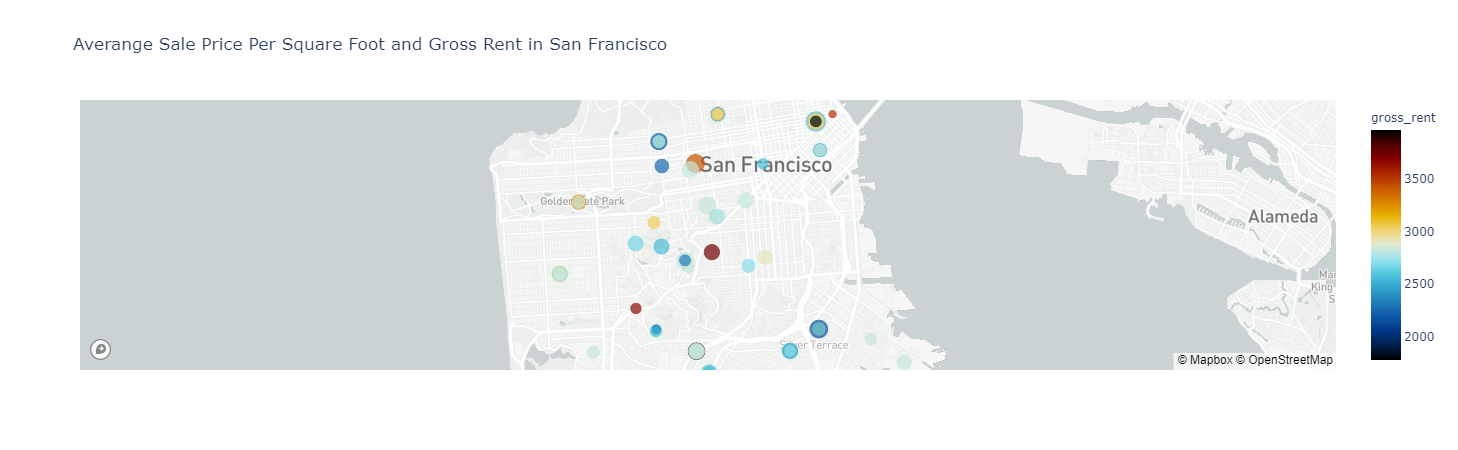

In [73]:
map.show()